## DIGIT RECOGNIZING - MNIST DATAASET (No pytorch/tf, just NUMPY)


In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


THE MNIST DATASET WAS DOWNLOADED FROM KAGGLE 

In [42]:
data = pd.read_csv('train.csv') #MNIST DATASET from kaggle
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data.shape #we have 42000 images and 785 columns

(42000, 785)

In [46]:
data = np.array(data)
np.random.shuffle(data) #shuffling the data
m,n

(42000, 785)

In [217]:
x = data[:, 1:].T/255.0  # extracting the pixel value 
y = data[:, 0]   # extracting the labels in the first column
m, n = data.shape
print(x.shape)
print(y.shape)

(784, 42000)
(42000,)


## DIGIT RECOGNIZING - MNIST DATAASET (No pytorch/tf, just NUMPY)


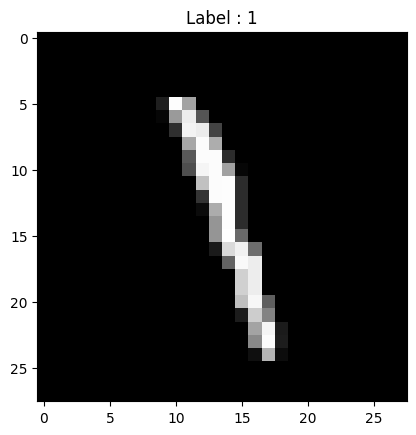

In [218]:
def image(a):
    a = np.random.randint(0, m)
    plt.imshow(x[:, a].reshape(28, 28), cmap='gray')
    plt.title("Label : {}".format(y[a]))
    plt.show()
#random image along with its label
img = image(0)


In [ ]:
#one hot encoding
def one_hot(y):
    one_hot_y = np.zeros((10, y.size))
    for i in range(y.size):
        one_hot_y[y[i], i] = 1
    return one_hot_y
one_hot_y = one_hot(y)
one_hot_y.shape

(10, 42000)

In [220]:
#def parameters() :

class Parameters:
    def __init__(self):
        self.W1 = np.random.randn(10, 784) - 0.5   # adding bias to the weights
        self.W2 = np.random.randn(10, 10) - 0.5
        self.b1 = np.zeros((10,m)) - 0.5
        self.b2 = np.zeros((10, m)) - 0.5  
        self.alpha  = 0.1    # learning rate
params = Parameters()
W1 = params.W1
W2 = params.W2
b1 = params.b1
b2 = params.b2
alpha = params.alpha
        

print(W1.shape, W2.shape, b1.shape, b2.shape)
x.shape, one_hot_y.shape



(10, 784) (10, 10) (10, 42000) (10, 42000)


((784, 42000), (10, 42000))

In [221]:
#ACTIVATION FUNCTIONS 
 
def RELU(L):
    return np.maximum(0, L) #rectified linear unit

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0) #softmax function
 

In [222]:
def for_pass(W1, W2, b1, b2, x):
    L1 = np.dot(W1, x) + b1 #first layer
    A1 = RELU(L1) #activation function
    L2 = np.dot(W2, A1) + b2 #second layer
    A2 = softmax(L2) #activation function
    return L1, A1, L2, A2



L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)


In [223]:
def der_Relu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [234]:
def back_pass(L2, A2, one_hot_y, W2, A1, x, L1):
    dL2 = A2 - one_hot_y #error in the second layer
    dW2 = np.dot(dL2, A1.T)/m #gradient of the weights in the second layer
    db2 = np.sum(dL2, axis=1, keepdims=True)/m #gradient of the bias in the second layer
    dL1 = np.dot(W2.T, dL2) * der_Relu(L1) #error in the first layer
    dW1 = np.dot(dL1, x.T)/m #gradient of the weights in the first layer
    db1 = np.sum(dL1, axis=1, keepdims=True)/m #gradient of the bias in the first layer
    return dL2, dW2, db2, dL1, dW1, db1
  


In [225]:
def weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha) :
    #alpha = 0.01
    W1 = W1 - alpha*dW1    #aplha is the learning rate
    W2 = W2 - alpha*dW2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    return W1, W2, b1, b2

In [226]:
def get_predictions(A2) :
    return np.argmax(A2, 0) #returns the index of the maximum value in the array

In [237]:
def get_accuracy(predictions, y):
    return np.sum(predictions == y) / y.size  # returns the accuracy of the model


In [239]:
def gradient_descent(x, one_hot_y, alpha, iterations):
    #W1, W2, b1, b2 = parameters()
    W1 = params.W1
    W2 = params.W2
    b1 = params.b1
    b2 = params.b2
    for i in range(iterations):
        #forward pass
        L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
        #backward pass 
        dL2, dW2, db2, dL1, dW1, db1 = back_pass(L2, A2, one_hot_y, W2, A1, x, L1)
        #weight update
        W1, W2, b1, b2 = weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        #acalculating accuracy
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, y)
        if i % 100 == 0:
           print(f"accuracy is {accuracy}")
    return W1, W2, b1, b2
            
W1, W2, b1, b2, A2 = gradient_descent(x, one_hot_y, 0.01, 1000)
L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
predictions = get_predictions(A2)
accuracy = get_accuracy(predictions, y)
print(f"accuracy is {accuracy}") 

 

accuracy is 0.09838095238095237


KeyboardInterrupt: 

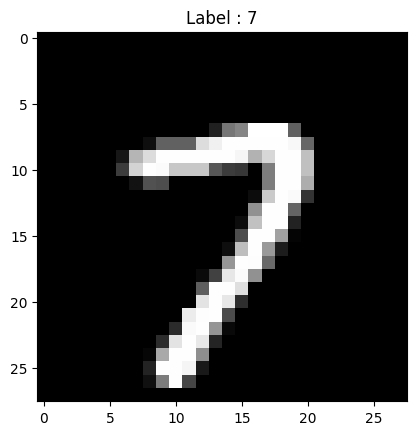

Iteration 0: Accuracy is 0.10


KeyboardInterrupt: 

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Load the MNIST dataset
data = pd.read_csv('train.csv') #MNIST DATASET from kaggle

# Extracting the pixel values and labels
x = data.iloc[:,1:].values.T / 255.0  # extracting the pixel value and normalizing
y = data.iloc[:,0].values.T   # extracting the labels in the first column
m, n = data.shape

# One-hot encode the labels
y_one_hot = np.eye(10)[y].T

# Function to display a random image along with its label
def image(a):
    a = np.random.randint(0, m)
    plt.imshow(x[:, a].reshape(28, 28), cmap='gray')
    plt.title("Label : {}".format(y[a]))
    plt.show()

# Display a random image
img = image(0)

# Initialize parameters
def parameters() :
    W1 = np.random.randn(128,784) * np.sqrt(2./784)   # He initialization
    W2 = np.random.randn(10,128) * np.sqrt(2./128)
    b1 = np.zeros((128,1))  # initialize biases to zero
    b2 = np.zeros((10,1))
    return W1, W2, b1, b2

# Activation functions
def RELU(x):
    return np.maximum(0, x) # rectified linear unit

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))  # for numerical stability
    return exp_x / np.sum(exp_x, axis=0, keepdims=True) # softmax function

# Forward pass
def for_pass(W1, W2, b1, b2) :
    L1 = np.dot(W1, x) + b1 # first layer
    A1 = RELU(L1) # activation function
    L2 = np.dot(W2, A1) + b2 # second layer
    A2 = softmax(L2) # activation function
    return L1, A1, L2, A2

# Backward pass
def back_pass(L2, A2, y_one_hot, W2, A1, x) :
    dL2 = A2 - y_one_hot # error in the second layer
    dW2 = np.dot(dL2, A1.T)/m # gradient of the weights in the second layer
    db2 = np.sum(dL2, axis=1, keepdims=True)/m # gradient of the bias in the second layer
    dL1 = np.dot(W2.T, dL2) * (A1 > 0) # error in the first layer with ReLU derivative
    dW1 = np.dot(dL1, x.T)/m # gradient of the weights in the first layer
    db1 = np.sum(dL1, axis=1, keepdims=True)/m # gradient of the bias in the first layer
    return dL2, dW2, db2, dL1, dW1, db1

# Update weights
def weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha) :
    W1 = W1 - alpha*dW1    # alpha is the learning rate
    W2 = W2 - alpha*dW2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    return W1, W2, b1, b2

# Get predictions
def get_predictions(A2) :
    return np.argmax(A2, 0) # returns the index of the maximum value in the array

# Get accuracy
def get_accuracy(predictions, y) :
    return np.sum(predictions == y)/m # returns the accuracy of the model

# Gradient descent
def gradient_descent(x, y_one_hot, y, alpha, iterations):
    W1, W2, b1, b2 = parameters()
    for i in range(iterations):
        # Forward pass
        L1, A1, L2, A2 = for_pass(W1, W2, b1, b2)
        
        # Backward pass
        dL2, dW2, db2, dL1, dW1, db1 = back_pass(L2, A2, y_one_hot, W2, A1, x)
        
        # Update weights
        W1, W2, b1, b2 = weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        
        # Monitor training progress
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, y)
        if i % 100 == 0:
            print(f"Iteration {i}: Accuracy is {accuracy:.2f}")
    
    return W1, W2, b1, b2, A2

# Example usage:
W1, W2, b1, b2, A2 = gradient_descent(x, y_one_hot, y, 0.01, 5000)  # use a smaller learning rate and more iterations

# Final predictions and accuracy
predictions = get_predictions(A2)
accuracy = get_accuracy(predictions, y)
print(f"Final accuracy: {accuracy:.2f}")